# Are you looking to buy or sell a property ?

# What’s the best price I can sell or buy the property?

## House prices of properties advertised in Amsterdam in 2021. 
## Dataset Source: Pararius.nl  

The original data provides features (variables) such as price for sale, price per sqm, area , neighbourhood (zip code, address) and the number of rooms. 

Our database comprise 924 properties listed on Pararius in August 2021. 
We will examine correlations and patterns among various variables and gain valuable insights to predict house prices in Amsterdam. 

but how? 
the prediction model analyzes data about the dataset properties to learn how different features (variables) affect their prices, enabling accurate price estimates in the future.
We aim to predict house prices in Amsterdam using machine learning models: Random Forest and XGBoost
We will fine-tuned these models to achieve best performance (accuracy & efficiency in house price prediction)

Our predictive models offer guidance and leverage internal property attributes to forecast prices to facilitate confident decision-making for anyone interested in buying or selling property in Amsterdam.



In [128]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [129]:
df=pd.read_csv('HousingPrices-Amsterdam-August-2021.csv')

In [130]:
df.head(30)

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538
5,6,"De Wittenkade 134 I, Amsterdam",1051 AM,450000.0,53,2,4.875024,52.382228
6,7,"Pruimenstraat 18 B, Amsterdam",1033 KM,450000.0,87,3,4.896536,52.410585
7,8,"Da Costakade 32 II, Amsterdam",1053 WL,590000.0,80,2,4.871555,52.371041
8,9,"Postjeskade 41 2, Amsterdam",1058 DG,399000.0,49,3,4.854671,52.363471
9,10,"Van Ostadestraat 193 H, Amsterdam",1073 TM,300000.0,33,2,4.897142,52.353111


In [131]:
df.shape

(924, 8)

In [132]:
df.columns

Index(['Unnamed: 0', 'Address', 'Zip', 'Price', 'Area', 'Room', 'Lon', 'Lat'], dtype='object')

In [133]:
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [134]:
df.isnull().values.any()

True

In [135]:
df.isnull().sum()

Address    0
Zip        0
Price      4
Area       0
Room       0
Lon        0
Lat        0
dtype: int64

In [136]:
numerical_columns = df.select_dtypes(exclude=object).columns.tolist() # list each of Categorical and Numerical columns

## Data Cleaning | Dealing with outliers | Missing values? 

In [137]:
# Dealing with outliers
for col in numerical_columns:
    upper_limit = df[col].mean() + 3 * df[col].std()
    lower_limit = df[col].mean() - 3 * df[col].std()
    df = df[(df[col] <= upper_limit) & (df[col] >= lower_limit)]

In [138]:
def num_cols_vis(col):
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'{col} Distribution')
    plt.show()

## EDA | Exploratory Data Analysis | Visualizations

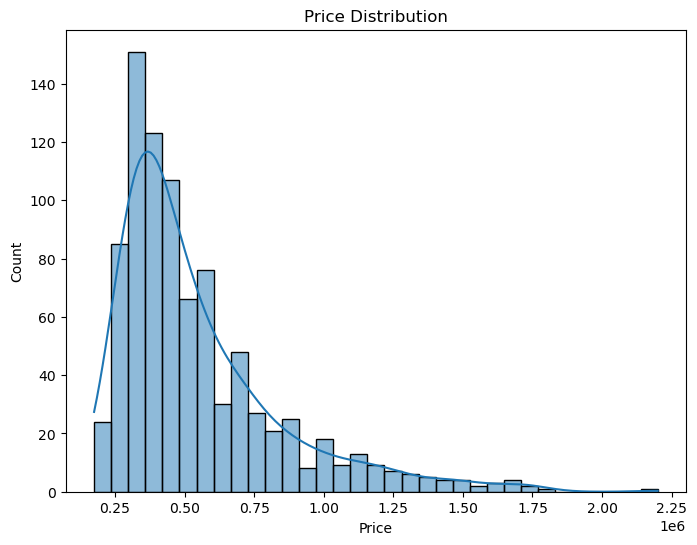

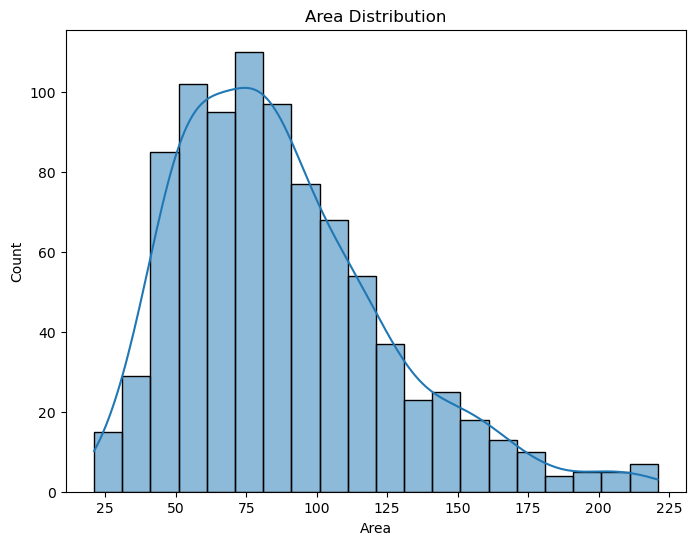

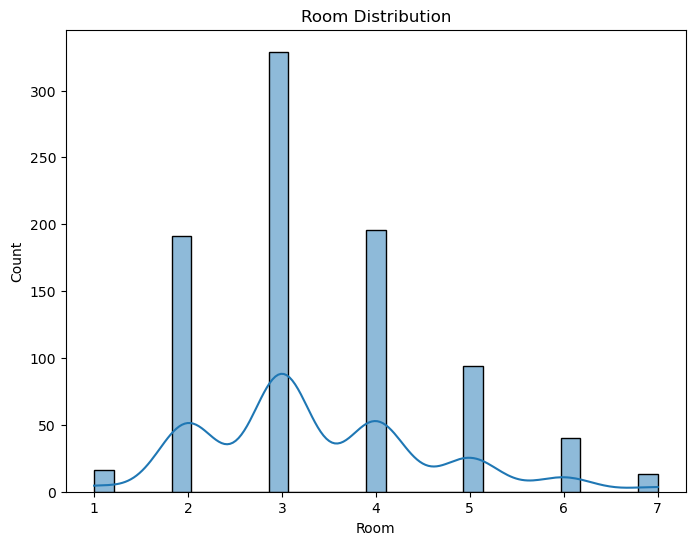

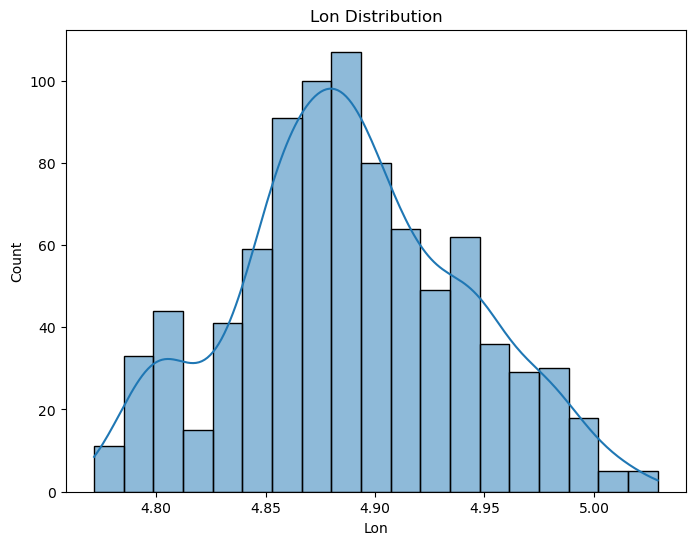

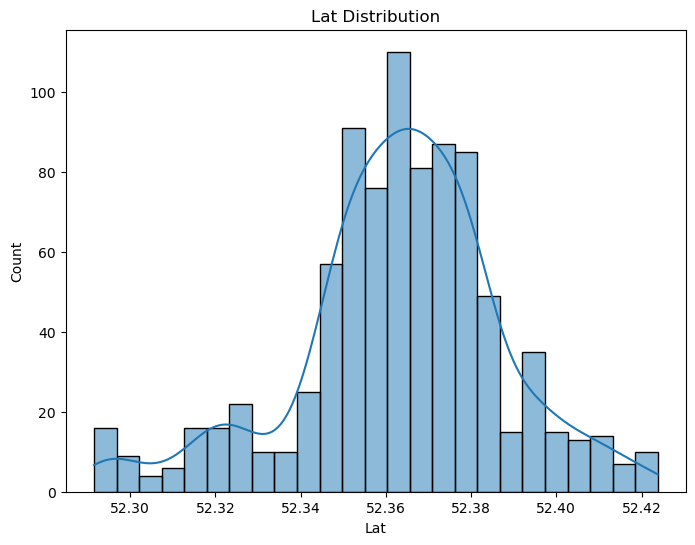

In [139]:
for col in numerical_columns:
    num_cols_vis(col)

#  What is the house price distribution? 

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is called 'df'

# Summary statistics
price_mean = df['Price'].mean()
price_median = df['Price'].median()
price_mode = df['Price'].mode()[0]  # Mode might return multiple values, so we select the first one
price_std = df['Price'].std()

print(f"Mean Price: {price_mean}")
print(f"Median Price: {price_median}")
print(f"Mode Price: {price_mode}")
print(f"Standard Deviation of Price: {price_std}")

Mean Price: 546603.1695108077
Median Price: 450000.0
Mode Price: 375000.0
Standard Deviation of Price: 298518.5194874161


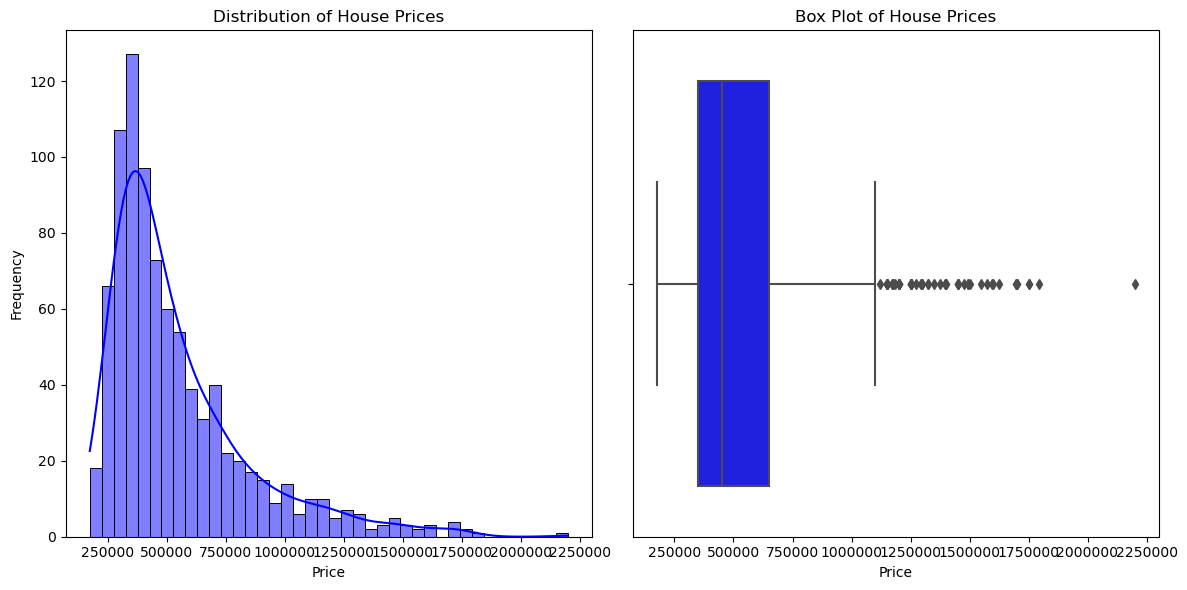

In [141]:
# Visualizations
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['Price'], bins=40, kde=True, color='blue')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.ticklabel_format(style='plain', axis='x')  # Display X-axis labels in plain format

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Price'], color='blue')
plt.title('Box Plot of House Prices')
plt.xlabel('Price')
plt.ticklabel_format(style='plain', axis='x')  # Display X-axis labels in plain format

plt.tight_layout()
plt.show()

In [142]:
# Consider our house price dataset is from 2021, as output is showing a higher frequency of prices in the range of 300.000 EUR to 800.000 EUR aprox, with decreasing frequency as prices increase.However, it's important to keep in mind that the dataset may not fully capture the recent trends or changes in the Amsterdam housing market 2024, especially if there has been significant price increases.

## Relationship between Area, Price and Number of Rooms?

In [143]:
# Calculate average price per square meter for each area
df['Price_per_sqm'] = df['Price'] / df['Area']

# Group by area and calculate average price per square meter
average_price_per_sqm = df.groupby('Area')['Price_per_sqm'].mean().reset_index()

# Sort areas by average price per square meter
average_price_per_sqm_sorted = average_price_per_sqm.sort_values(by='Price_per_sqm', ascending=False)

# Select top N neighborhoods with the highest average price per square meter
N = 10  # You can adjust this value as needed
top_N_areas = average_price_per_sqm_sorted.head(N)



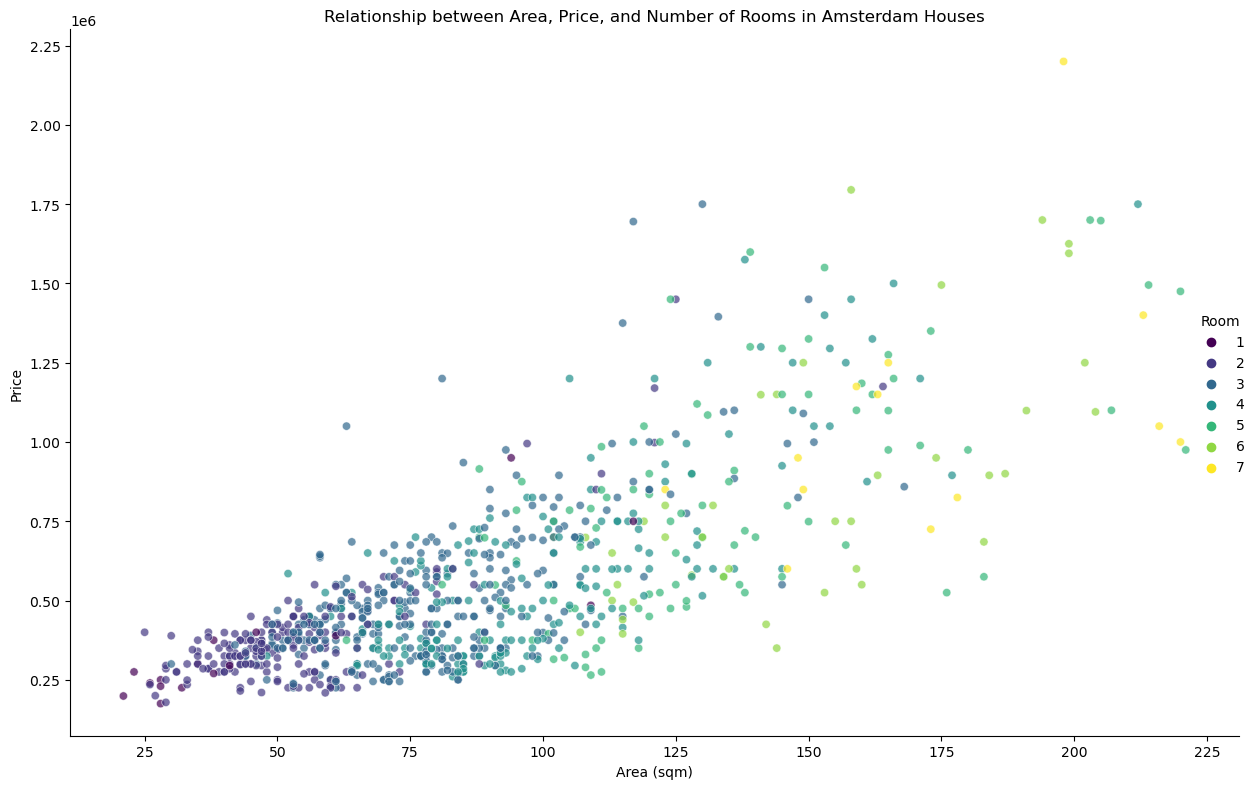

In [144]:
# Create a relational plot to visualize the relationship between area, price, and number of rooms
sns.relplot(x="Area", y="Price", hue="Room", data=df, palette='viridis', height=8, aspect=1.5, alpha=0.7)

# Set titles and labels
plt.title('Relationship between Area, Price, and Number of Rooms in Amsterdam Houses')
plt.xlabel('Area (sqm)')
plt.ylabel('Price')
plt.tight_layout()

# Show the plot
plt.show()

In [145]:
# Calculate the total price and total area
total_price = df['Price'].sum()
total_area = df['Area'].sum()

# Calculate the average price per square meter
avg_price_per_sqm = total_price / total_area
avg_price_per_sqm_rounded = round(avg_price_per_sqm, 2)

print("Average Price per Square Meter:", avg_price_per_sqm_rounded)



Average Price per Square Meter: 6239.39


## How is the price & distribution properties per neighbourhood?

In [146]:
# Access the 'Price' column
prices = df['Price']

# Access the 'Zip' column
zips = df['Zip']

# Display the first few values of each column
print("Prices:", prices.head())
print("ZIP Codes:", zips.head())


Prices: 0    685000.0
1    475000.0
2    850000.0
3    580000.0
4    720000.0
Name: Price, dtype: float64
ZIP Codes: 0    1091 CR
1    1059 EL
2    1097 SM
3    1060 TH
4    1036 KN
Name: Zip, dtype: object


In [147]:
# Group the data by ZIP code and calculate mean, median, etc., for the prices within each ZIP code
price_stats_by_zip = df.groupby('Zip')['Price'].agg(['mean', 'median', 'min', 'max', 'count']).reset_index()

# Display the summary statistics for prices within each ZIP code
print(price_stats_by_zip)


         Zip      mean    median       min       max  count
0    1011 AW  640000.0  640000.0  635000.0  645000.0      3
1    1011 BG  469000.0  469000.0  469000.0  469000.0      1
2    1011 DG  999500.0  999500.0  999500.0  999500.0      1
3    1011 EH  512000.0  512000.0  512000.0  512000.0      1
4    1011 EJ  695000.0  695000.0  695000.0  695000.0      1
..       ...       ...       ...       ...       ...    ...
790  1108 BR  325000.0  325000.0  325000.0  325000.0      1
791  1108 CA  300000.0  300000.0  300000.0  300000.0      1
792  1108 CN  350000.0  350000.0  350000.0  350000.0      1
793  1109 BK  549001.0  549001.0  549001.0  549001.0      1
794  1109 BW  475000.0  475000.0  475000.0  475000.0      1

[795 rows x 6 columns]


In [148]:
# Get all unique ZIP code values
unique_zips = df['Zip'].unique()

# Display the unique ZIP code values
print(unique_zips)




['1091 CR' '1059 EL' '1097 SM' '1060 TH' '1036 KN' '1051 AM' '1033 KM'
 '1053 WL' '1058 DG' '1073 TM' '1058 HN' '1019 LD' '1091 CK' '1017 AD'
 '1091 CT' '1036 KE' '1058 VP' '1064 CP' '1102 SX' '1013 WJ' '1016 DP'
 '1072 JK' '1062 BS' '1095 JX' '1034 LH' '1035 HG' '1083 GP' '1056 JJ'
 '1072 HN' '1078 DE' '1076 JP' '1053 DS' '1083 TL' '1073 GJ' '1054 TL'
 '1018 NB' '1019 JX' '1056 TD' '1053 XP' '1106 DM' '1018 VS' '1093 TE'
 '1056 NZ' '1095 BN' '1104 VA' '1064 WX' '1024 BG' '1062 JS' '1068 JC'
 '1013 DR' '1017 HH' '1034 BM' '1075 XR' '1035 PE' '1011 PT' '1055 GW'
 '1095 AN' '1024 VE' '1056 XJ' '1058 XZ' '1078 EZ' '1054 KJ' '1024 HM'
 '1055 KE' '1095 MD' '1097 NR' '1094 EB' '1107 PW' '1033 HR' '1055 GG'
 '1067 JG' '1025 HE' '1072 KA' '1107 DK' '1052 TR' '1095 RZ' '1057 RX'
 '1017 VX' '1013 XT' '1015 GL' '1018 KP' '1055 RD' '1052 AA' '1016 EH'
 '1018 AW' '1053 VC' '1061 SR' '1059 BH' '1012 ET' '1013 RP' '1076 RA'
 '1077 DE' '1098 TK' '1063 KS' '1051 EA' '1092 EW' '1062 KC' '1015 DT'
 '1103

In [149]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [150]:
import pandas as pd
def map_zip_to_neighborhood(zip_code):
    # Extract only the numeric part of the zip code
    zip_code_numeric = ''.join(filter(str.isdigit, zip_code))
    if zip_code_numeric:
        zip_code_numeric = int(zip_code_numeric)
        if 1011 <= zip_code_numeric <= 1019:
            return 'Amsterdam-Centrum'
        elif 1050 <= zip_code_numeric <= 1059:
            return 'Amsterdam-West'
        elif 1070 <= zip_code_numeric <= 1079:
            return 'Amsterdam-Zuid'
        elif 1030 <= zip_code_numeric <= 1039:
            return 'Amsterdam-Noord'
        elif 1090 <= zip_code_numeric <= 1099:
            return 'Amsterdam-Oost'
        elif 1100 <= zip_code_numeric <= 1119:
            return 'Amsterdam-Zuidoost'
        elif 1060 <= zip_code_numeric <= 1069:
            return 'Amsterdam-Nieuw-West'
        # Add more conditions for other neighborhoods
    return 'Other'


# Apply the mapping function to create a new column 'Neighborhood'
df['Neighborhood'] = df['Zip'].apply(map_zip_to_neighborhood)

# Display the count of properties in each neighborhood
print(df['Neighborhood'].value_counts())

Neighborhood
Amsterdam-West          176
Amsterdam-Centrum       165
Amsterdam-Nieuw-West    148
Other                    94
Amsterdam-Zuid           93
Amsterdam-Zuidoost       79
Amsterdam-Oost           75
Amsterdam-Noord          49
Name: count, dtype: int64


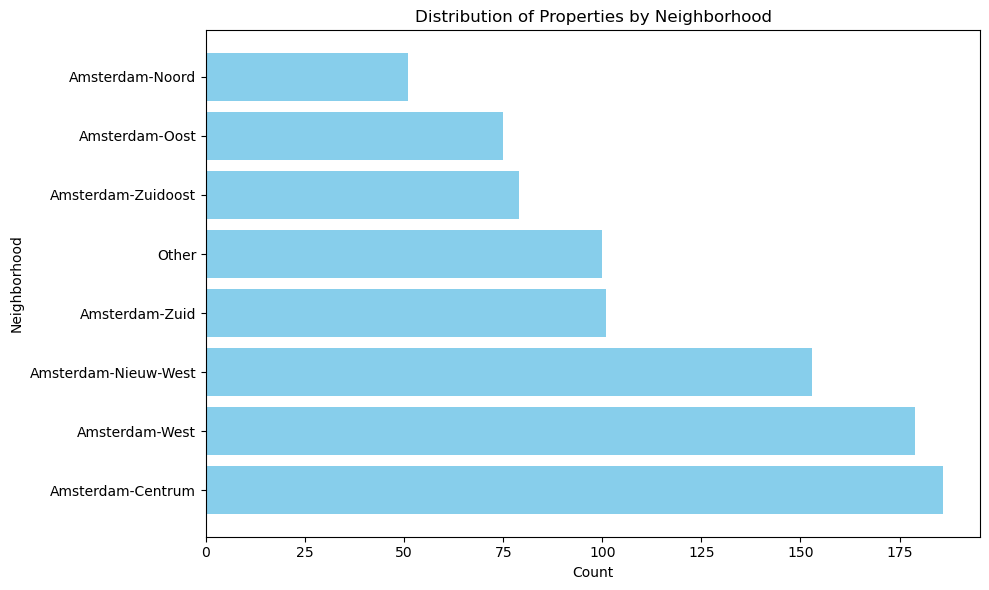

In [151]:
import matplotlib.pyplot as plt

# Data
neighborhood_counts = {
    'Amsterdam-Centrum': 186,
    'Amsterdam-West': 179,
    'Amsterdam-Nieuw-West': 153,
    'Amsterdam-Zuid': 101,
    'Other': 100,
    'Amsterdam-Zuidoost': 79,
    'Amsterdam-Oost': 75,
    'Amsterdam-Noord': 51
}

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(list(neighborhood_counts.keys()), list(neighborhood_counts.values()), color='skyblue')
plt.xlabel('Count')
plt.ylabel('Neighborhood')
plt.title('Distribution of Properties by Neighborhood')
plt.tight_layout()
plt.show()


In [152]:
# Inspect the first few rows of the DataFrame
print(df.head())


                                  Address      Zip     Price  Area  Room  \
0            Blasiusstraat 8 2, Amsterdam  1091 CR  685000.0    64     3   
1  Kromme Leimuidenstraat 13 H, Amsterdam  1059 EL  475000.0    60     3   
2              Zaaiersweg 11 A, Amsterdam  1097 SM  850000.0   109     4   
3            Tenerifestraat 40, Amsterdam  1060 TH  580000.0   128     6   
4              Winterjanpad 21, Amsterdam  1036 KN  720000.0   138     5   

        Lon        Lat  Price_per_sqm          Neighborhood  
0  4.907736  52.356157   10703.125000        Amsterdam-Oost  
1  4.850476  52.348586    7916.666667        Amsterdam-West  
2  4.944774  52.343782    7798.165138        Amsterdam-Oost  
3  4.789928  52.343712    4531.250000  Amsterdam-Nieuw-West  
4  4.902503  52.410538    5217.391304       Amsterdam-Noord  


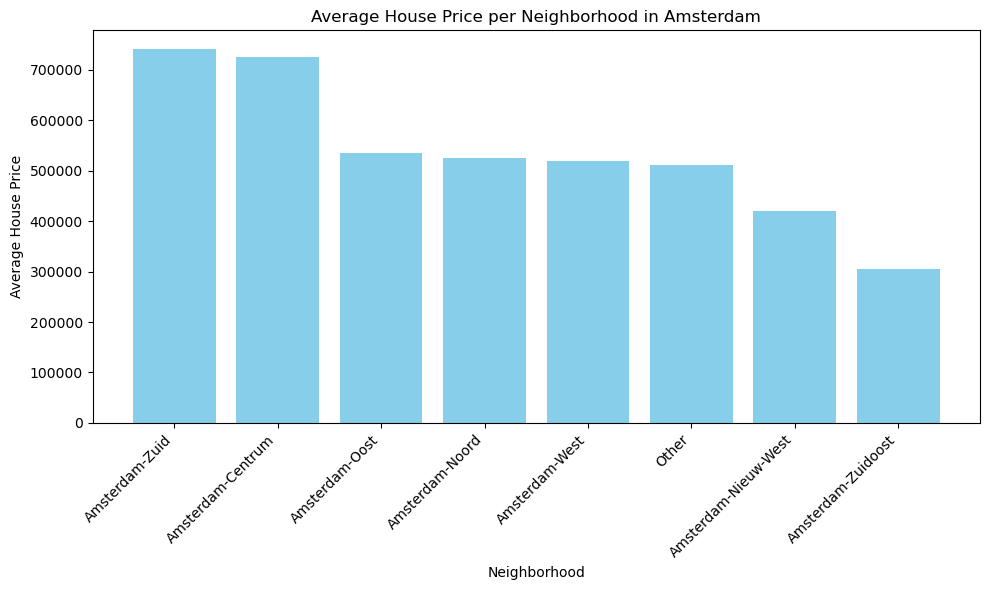

In [153]:
import matplotlib.pyplot as plt

# Grouping by Neighborhood and calculating the mean house price
average_prices = df.groupby('Neighborhood')['Price'].mean().reset_index()

# Sorting the neighborhoods by average price in descending order
average_prices = average_prices.sort_values(by='Price', ascending=False)

# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.bar(average_prices['Neighborhood'], average_prices['Price'], color='skyblue')
plt.title('Average House Price per Neighborhood in Amsterdam')
plt.xlabel('Neighborhood')
plt.ylabel('Average House Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## CORRELATION MATRIX | RELATIONSHIPS BETWEEN VARIABLES

Area vs. Price: Generally positive correlation, the larger the property the higher price

Number of Rooms vs. Price: Moderate correlation with price, larger number of rooms correlates with higher price

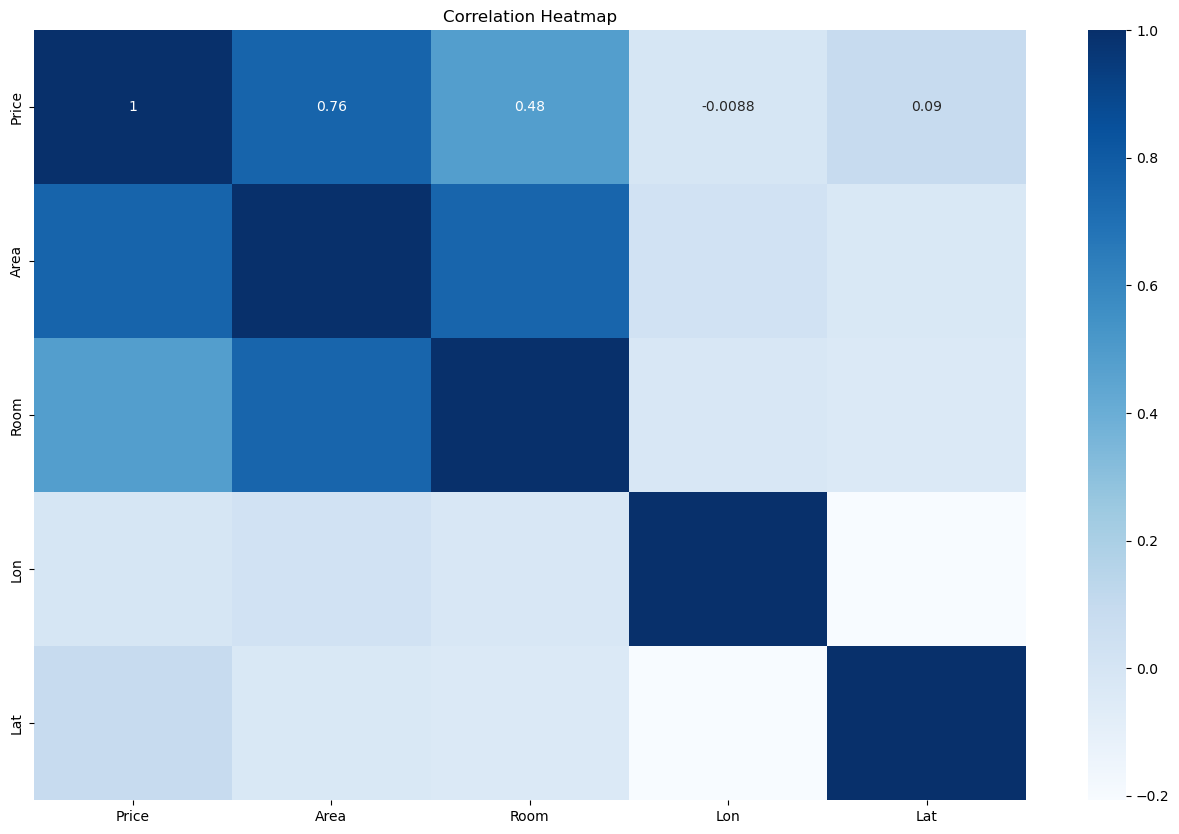

In [154]:
# Display the correlation matrix to find the relationship between each column and the target column
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()

## DATA PREPROCESSING for prediction

In [155]:
# Data Preprocessing
# Drop irrelevant columns
df.drop(columns=['Address', 'Zip'], inplace=True)


In [156]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [157]:
# Encode categorical variable 'Neighborhood'
label_encoder = LabelEncoder()
df['Neighborhood'] = label_encoder.fit_transform(df['Neighborhood'])

## SPLITING THE DATA

In [158]:
X = df.drop(['Price'], axis=1) 
y = df['Price']

In [159]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the sizes of the resulting datasets
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))
print("Training target variable size:", len(y_train))
print("Testing target variable size:", len(y_test))

Training set size: 703
Testing set size: 176
Training target variable size: 703
Testing target variable size: 176


In [160]:
# Checking for missing values in the dataset
missing_values = df.isnull().sum()

# Display columns with missing values and the number of missing values in each column
print("Columns with missing values:")
print(missing_values[missing_values > 0])


Columns with missing values:
Series([], dtype: int64)


In [161]:
# Dropping rows with missing values
df_clean = df.dropna(subset=['Price', 'Price_per_sqm'])

# Verify that missing values are removed
print("Columns with missing values after dropping:")
print(df_clean.isnull().sum())



Columns with missing values after dropping:
Price            0
Area             0
Room             0
Lon              0
Lat              0
Price_per_sqm    0
Neighborhood     0
dtype: int64


## LABEL-ENCODER NEIGHBOURHOOD | PREPARING DATA FOR MODELS

In [162]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variable 'Neighborhood'
label_encoder = LabelEncoder()
df_clean['Neighborhood'] = label_encoder.fit_transform(df_clean['Neighborhood'])

# Features (X) and target variable (y)
X = df_clean.drop(columns=['Price'])  # Features
y = df_clean['Price']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the sizes of the resulting datasets
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))
print("Training target variable size:", len(y_train))
print("Testing target variable size:", len(y_test))


Training set size: 703
Testing set size: 176
Training target variable size: 703
Testing target variable size: 176


In [163]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Define and train Random Forest model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Define and train XGBoost model
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

## PREDICTION | Mean Squarred Error (RMSE)

In [164]:
from sklearn.metrics import mean_squared_error

# Predict house prices using the Random Forest model
rf_predictions = rf.predict(X_test)

# Predict house prices using the XGBoost model
xgb_predictions = xgb.predict(X_test)

# Evaluate the performance of the Random Forest model
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)
print("Random Forest RMSE:", rf_rmse)

# Evaluate the performance of the XGBoost model
xgb_rmse = mean_squared_error(y_test, xgb_predictions, squared=False)
print("XGBoost RMSE:", xgb_rmse)


Random Forest RMSE: 29626.978574102992
XGBoost RMSE: 25293.853497534918


In [165]:
# The Random Forest model seems to perform better, as it has a lower RMSE compared to the XGBoost model. This indicates that the Random Forest model's predictions are closer to the actual house prices in the testing set. 

## HYPERPARAMETER TUNING 

In [166]:
from sklearn.model_selection import GridSearchCV

# Random Forest Hyperparameter Tuning
# Grid of parameters to tune
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# GridSearchCV
rf_grid = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                       param_grid=rf_params,
                       cv=3,
                       scoring='neg_mean_squared_error',
                       verbose=1)

rf_grid.fit(X_train, y_train)
print("Best parameters for Random Forest:", rf_grid.best_params_)
print("Best score for Random Forest:", np.sqrt(-rf_grid.best_score_))

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 300}
Best score for Random Forest: 55205.00851358965


In [167]:
# XGBoost Hyperparameter Tuning
# Grid of parameters to tune
xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9]
}

# GridSearchCV
xgb_grid = GridSearchCV(estimator=XGBRegressor(random_state=42),
                        param_grid=xgb_params,
                        cv=3,
                        scoring='neg_mean_squared_error',
                        verbose=1)

xgb_grid.fit(X_train, y_train)
print("Best parameters for XGBoost:", xgb_grid.best_params_)
print("Best score for XGBoost:", np.sqrt(-xgb_grid.best_score_))

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
Best score for XGBoost: 37364.20959959823


## EVALUATE models performance | mean squared error (RMSE) & R2 squared 

In [168]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Evaluate model performance
def evaluate_model(model, X_test, y_test):
    # Make predictions
    y_pred = model.predict(X_test)
    # Calculate RMSE
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    # Calculate R-squared
    r2 = r2_score(y_test, y_pred)
    return rmse, r2

In [169]:
# Calculate RMSE and R-squared for Random Forest
rf_rmse, rf_r2 = evaluate_model(rf_grid.best_estimator_, X_test, y_test)
print("Random Forest RMSE:", rf_rmse)
print("Random Forest R-squared:", rf_r2)

Random Forest RMSE: 30254.59326832901
Random Forest R-squared: 0.9867341270557419


In [170]:
# Calculate RMSE and R-squared for XGBoost
xgb_rmse, xgb_r2 = evaluate_model(xgb_grid.best_estimator_, X_test, y_test)
print("XGBoost RMSE:", xgb_rmse)
print("XGBoost R-squared:", xgb_r2)

XGBoost RMSE: 20071.183841520822
XGBoost R-squared: 0.9941615283790999


In [171]:
# We will evaluate the performance of both the Random Forest and XGBoost models, and visualize their predictions by plotting actual vs. predicted prices

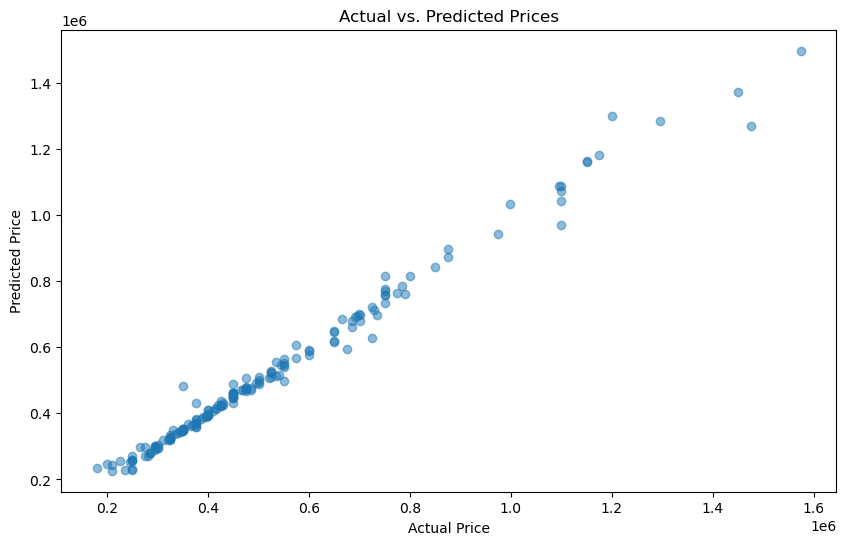

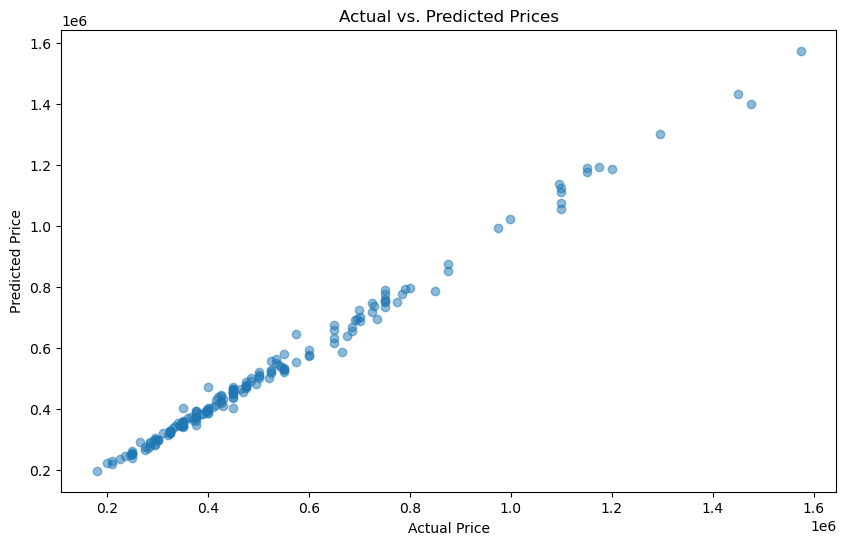

In [172]:
# Visualize predictions
def visualize_predictions(model, X_test, y_test):
    # Make predictions
    y_pred = model.predict(X_test)
    # Plot actual vs. predicted prices
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title('Actual vs. Predicted Prices')
    plt.show()

# Visualize predictions for Random Forest
visualize_predictions(rf_grid.best_estimator_, X_test, y_test)

# Visualize predictions for XGBoost
visualize_predictions(xgb_grid.best_estimator_, X_test, y_test)


In [173]:
# Visualize predictions in tabular format
def visualize_predictions_table(model, X_test, y_test):
    # Make predictions
    y_pred = model.predict(X_test)
    # Create a DataFrame to display actual and predicted prices side by side
    predictions_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
    # Display the DataFrame
    display(predictions_df)

# Visualize predictions for Random Forest
print("Random Forest Predictions:")
visualize_predictions_table(rf_grid.best_estimator_, X_test, y_test)

# Visualize predictions for XGBoost
print("\nXGBoost Predictions:")
visualize_predictions_table(xgb_grid.best_estimator_, X_test, y_test)


Random Forest Predictions:


,Actual Price,Predicted Price
365,400000.0,4.103260e+05
266,469000.0,4.711958e+05
831,325000.0,3.244431e+05
350,250000.0,2.284309e+05
229,410000.0,4.077366e+05
...,...,...
618,550000.0,5.409523e+05
255,1100011.0,1.043339e+06
517,295000.0,3.012267e+05
385,650000.0,6.452581e+05



XGBoost Predictions:


,Actual Price,Predicted Price
365,400000.0,3.958902e+05
266,469000.0,4.560360e+05
831,325000.0,3.286285e+05
350,250000.0,2.520951e+05
229,410000.0,4.073054e+05
...,...,...
618,550000.0,5.284476e+05
255,1100011.0,1.110119e+06
517,295000.0,2.975674e+05
385,650000.0,6.604243e+05


In [174]:
# Predict prices using the trained model (XGBOOST)
y_pred = rf.predict(X_test)

# Combine actual prices, predicted prices, and other features into a DataFrame
predictions_df = X_test.copy()
predictions_df['Actual Price'] = y_test
predictions_df['Predicted Price'] = y_pred

# Display the first few rows of the DataFrame
predictions_df.head(10)



,Area,Room,Lon,Lat,Price_per_sqm,Neighborhood,Actual Price,Predicted Price
365,49,2,4.872222,52.366766,8163.265306,4,400000.0,407000.00
266,90,3,4.903526,52.374705,5211.111111,0,469000.0,469456.38
831,98,3,4.956816,52.317410,3316.326531,6,325000.0,326200.00
350,60,2,4.947171,52.325081,4166.666667,6,250000.0,228410.00
229,66,4,4.920472,52.357987,6212.121212,3,410000.0,404940.11
719,75,3,4.790104,52.381911,4133.333333,1,310000.0,320710.00
622,155,6,4.832889,52.367757,4838.709677,1,750000.0,814670.00
496,27,2,4.818173,52.381780,7407.407407,1,200000.0,250260.00
857,98,3,4.861985,52.322384,7132.653061,7,699000.0,702099.00
42,91,4,4.987296,52.300656,3571.428571,6,325000.0,324550.00


## EVALUATION & CONCLUSION

This project demonstrates the application of machine learning techniques to predict house prices in Amsterdam.

While our models demonstrated promising accuracy in predicting house prices based on internal property attributes, it's essential to acknowledge the limitations regarding external market factors. Factors such as economic conditions, government policies, and market sentiment.

We aimed to predict house prices in Amsterdam using machine learning models, specifically Random Forest and XGBoost

The models provided reasonably accurate predictions of house prices in Amsterdam, XGBoost performed slightly better than Rnadom Forest.

Our predictive models offer guidance and leverage internal property attributes to forecast prices to facilitate confident decision-making for anyone interested in buying or selling property in Amsterdam.

Root Mean Squared Error (RMSE):

Random Forest: RMSE of approximately 30,254.59.
XGBoost: RMSE of approximately 20,071.18.
The lower the RMSE, the better the model's predictive accuracy

R-squared (R²):

Random Forest: R-squared of approximately 0.987. (98%)
XGBoost: R-squared of approximately 0.994. (99%)
R-squared represents the proportion of the variance in the dependent variable (house prices) that is predictable from the independent variables (features) in the model. A higher R-squared value indicates a better fit of the model to the data

This prediction model can be used by buyers, sellers, or real estate agents to get an idea of how much a house might cost based on its characteristics. It helps people make informed decisions about buying or selling property. Ideally we will continue this project creating a frontend app user friendly based on the prediction model.